# Explore here

In [2]:
# Your code here
import pandas as pd

# URL del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

# Cargar datos
df = pd.read_csv(url)

# Crear carpeta y guardar el archivo
import os
raw_data_path = "./data/raw"
os.makedirs(raw_data_path, exist_ok=True)
df.to_csv(f"{raw_data_path}/AB_NYC_2019.csv", index=False)

print("✅ Datos cargados y almacenados en './data/raw'")

✅ Datos cargados y almacenados en './data/raw'


EDA

In [5]:
 
print("✅ Información general:")
print(df.info())

print("\n✅ Estadísticas descriptivas:")
print(df.describe())

print("\n✅ Primeras filas:")
print(df.head())

print("\n✅ Valores nulos por columna:")
print(df.isnull().sum())

✅ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revi

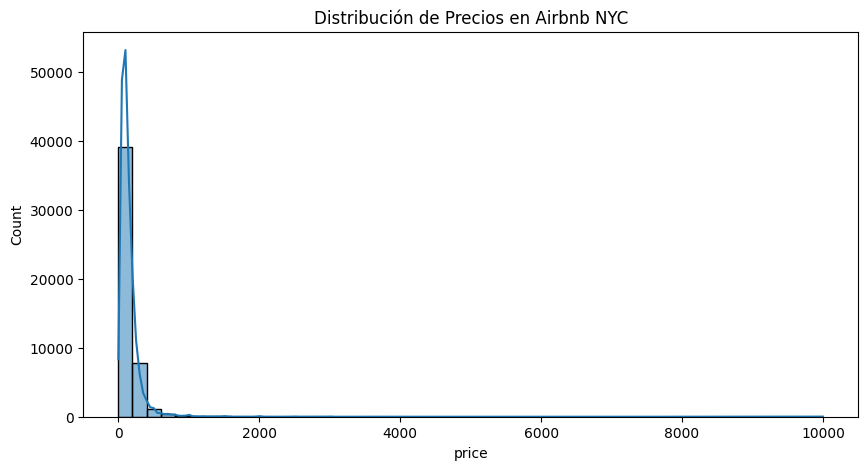

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución de Precios en Airbnb NYC")
plt.show()

In [7]:
 
columns_to_keep = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']
df_filtered = df[columns_to_keep]

print("✅ Variables seleccionadas:")
print(df_filtered.head())

✅ Variables seleccionadas:
  neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  
0                  9  
1                 45  
2                  0  
3                270  
4                  9  


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_filtered, test_size=0.2, random_state=42)


In [12]:
processed_data_path = "/workspaces/machine-learning-python-template/data/processed"
os.makedirs(processed_data_path, exist_ok=True)

train.to_csv(f"{processed_data_path}/train.csv", index=False)
test.to_csv(f"{processed_data_path}/test.csv", index=False)

